# for any dataset follow this process it
#1) load dataset
#2) clean or remove null value 
#3) seprate numerical colmn
#4) seperate categorial column
#5) then concate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import skew

In [2]:
df=pd.read_csv("E:\\sukamal sir machine learning\\Python_ML_new-master\\Automobile_data.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.replace("?","nan",inplace=True)

In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [6]:
df["normalized-losses"]=df["normalized-losses"].astype(float)

In [7]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [8]:
normal_mean=df["normalized-losses"].mean()
normal_mean

122.0

In [9]:
df["normalized-losses"].fillna(normal_mean,inplace=True)

In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [11]:
for col in df:
    col,'-',df[col].unique()
    print(col,'-',df[col].unique())

symboling - [ 3  1  2  0 -1 -2]
normalized-losses - [122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make - ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type - ['gas' 'diesel']
body-style - ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels - ['rwd' 'fwd' '4wd']
engine-location - ['front' 'rear']
width - [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]
height - [48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.

In [12]:
df["horsepower"]=df["horsepower"].astype(float)

In [13]:
horse_mean=df["horsepower"].mean()
horse_mean

104.25615763546799

In [14]:
df["horsepower"].fillna(horse_mean,inplace=True)

In [15]:
df.corr()["price"] 

symboling           -0.085781
normalized-losses    0.133424
width                0.718253
height               0.132444
engine-size          0.852995
horsepower           0.746589
city-mpg            -0.654611
highway-mpg         -0.679048
price                1.000000
Name: price, dtype: float64

In [17]:
df_num=df.select_dtypes(["int64","float64"])

In [18]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
5,2,122.0,66.3,53.1,136,110.0,19,25,15250
6,1,158.0,71.4,55.7,136,110.0,19,25,17710
7,1,122.0,71.4,55.7,136,110.0,19,25,18920
8,1,158.0,71.4,55.9,131,140.0,17,20,23875
9,0,122.0,67.9,52.0,131,160.0,16,22,12000


In [19]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [20]:
for col in df_num:
    print(col,skew(df_num[col]))

symboling 0.20952469094997359
normalized-losses 0.8485348696008058
width 0.8973753485201392
height 0.06265991683394276
engine-size 1.9333748457840114
horsepower 1.3875147343096037
city-mpg 0.6588377533622138
highway-mpg 0.5360379305163596
price 1.791937476907277


symboling 0.20952469094997359


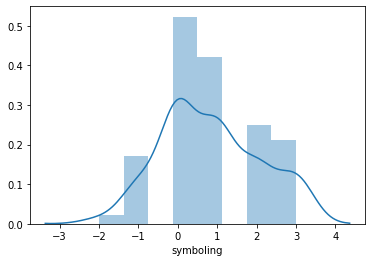

normalized-losses 0.8485348696008058


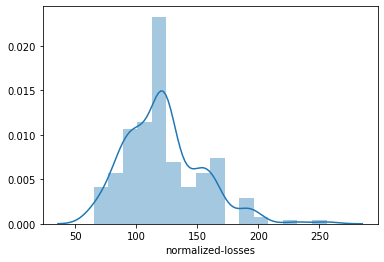

width 0.8973753485201392


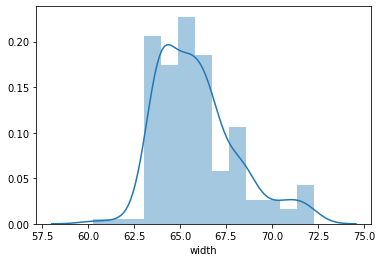

height 0.06265991683394276


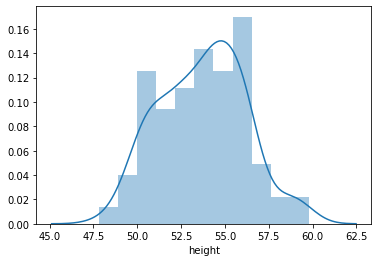

engine-size 1.9333748457840114


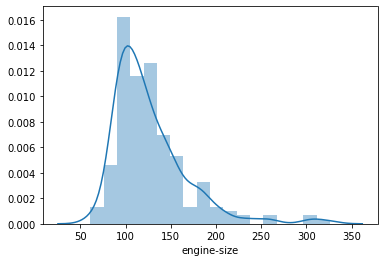

horsepower 1.3875147343096037


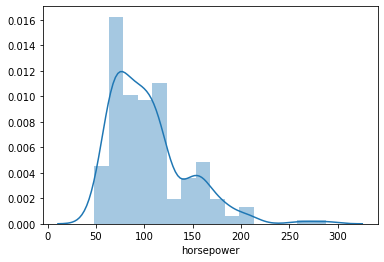

city-mpg 0.6588377533622138


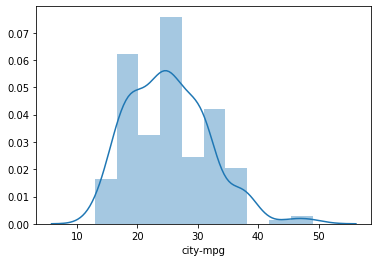

highway-mpg 0.5360379305163596


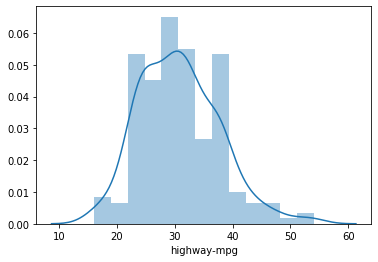

price 1.791937476907277


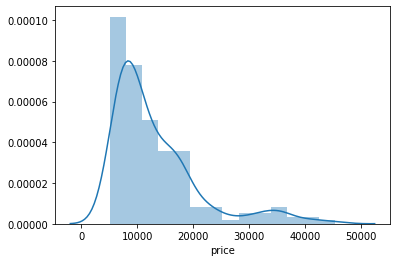

In [21]:
for col in df_num:
    print(col,skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [22]:
for col in df_num:
    if skew(df_num[col]) >= 1 or skew(df_num[col]) <= -1:
        df_num[col]=np.sqrt(df_num[col])

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
for col in df_num:
    print(col,skew(df_num[col]))

symboling 0.20952469094997359
normalized-losses 0.8485348696008058
width 0.8973753485201392
height 0.06265991683394276
engine-size 1.3543684515048457
horsepower 0.8829652033146684
city-mpg 0.6588377533622138
highway-mpg 0.5360379305163596
price 1.205185024107658


In [24]:
cor=df_num.corr()

In [25]:
cor

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.232919,-0.541038,-0.116386,0.063424,-0.035823,0.034606,-0.090994
normalized-losses,0.465190,1.000000,0.084195,-0.370706,0.112514,0.215481,-0.218749,-0.178221,0.159456
width,-0.232919,0.084195,1.000000,0.279210,0.750519,0.658804,-0.642704,-0.677218,0.749834
height,-0.541038,-0.370706,0.279210,1.000000,0.093387,-0.091057,-0.048640,-0.107358,0.153947
engine-size,-0.116386,0.112514,0.750519,0.093387,1.000000,0.818202,-0.675183,-0.694948,0.841303
horsepower,0.063424,0.215481,0.658804,-0.091057,0.818202,1.000000,-0.843455,-0.815216,0.780429
city-mpg,-0.035823,-0.218749,-0.642704,-0.048640,-0.675183,-0.843455,1.000000,0.971337,-0.703022
highway-mpg,0.034606,-0.178221,-0.677218,-0.107358,-0.694948,-0.815216,0.971337,1.000000,-0.722787
price,-0.090994,0.159456,0.749834,0.153947,0.841303,0.780429,-0.703022,-0.722787,1.000000


In [26]:
df_cat=df.select_dtypes(object)

In [27]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [28]:
from sklearn.preprocessing import LabelEncoder 

In [31]:
for col in df_cat:
    
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [33]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [34]:
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,11.401754,10.535654,21,27,116.167982,0,1,0,2,0,0
1,3,122.0,64.1,48.8,11.401754,10.535654,21,27,128.452326,0,1,0,2,0,0
2,1,122.0,65.5,52.4,12.328828,12.409674,19,26,128.452326,0,1,2,2,0,5
3,2,164.0,66.2,54.3,10.440307,10.099505,24,30,118.110118,1,1,3,1,0,3
4,2,164.0,66.4,54.3,11.661904,10.723805,18,22,132.098448,1,1,3,0,0,3


In [35]:
def model(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    mse=mean_squared_error(y_pred,y_test)
    mae=mean_absolute_error(y_pred,y_test)
    r2=r2_score(y_pred,y_test)
    coef=lr.coef_
    intercept=lr.intercept_
    return(mse,mae,r2,coef,intercept)

In [37]:
x=df_new.drop("price",axis=1)
y=df["price"]
result=model(x,y)
print("mse",result[0])
print("mae",result[1])
print("r2",result[2])
print("coef",result[3][0])
print("intercept",result[4])

mse 13079406.537779978
mae 2637.974742888439
r2 0.7313297853104073
coef 46.869054615757726
intercept -80187.47111795931


# Regularization 

In [38]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [45]:
for i in range (50):
    l2 =Ridge(alpha=i)
    l2.fit(x_train, y_train)
    print( i, ":", l2.score(x_test,y_test))

0 : 0.7829498213735259
1 : 0.7925624230821421
2 : 0.7956687176784596
3 : 0.7971399109822782
4 : 0.7980025294932482
5 : 0.79857953357316
6 : 0.7989999077127148
7 : 0.7993242332324338
8 : 0.799584533936017
9 : 0.799799328140605
10 : 0.7999801009735235
11 : 0.8001343828905468
12 : 0.8002673378234029
13 : 0.800382639124774
14 : 0.8004829804981123
15 : 0.8005703884718893
16 : 0.8006464213856491
17 : 0.8007123005813118
18 : 0.8007689995262942
19 : 0.8008173059482053
20 : 0.8008578661404135
21 : 0.800891217180595
22 : 0.800917810765206
23 : 0.8009380311090278
24 : 0.8009522085669412
25 : 0.8009606301223551
26 : 0.8009635475473658
27 : 0.8009611838105356
28 : 0.8009537381504537
29 : 0.8009413901229234
30 : 0.8009243028512132
31 : 0.8009026256523006
32 : 0.8008764961708016
33 : 0.800846042121803
34 : 0.8008113827210442
35 : 0.8007726298637569
36 : 0.8007298891003756
37 : 0.8006832604473039
38 : 0.8006328390631698
39 : 0.8005787158149325
40 : 0.800520977753459
41 : 0.8004597085144495
42 : 0.8003

In [47]:
l2.coef_

array([ 1.11713569e+02, -1.32490569e+00,  5.31667317e+02,  4.60550470e+02,
        1.95031294e+03,  8.64738273e+02,  2.45542833e+02, -3.09453080e+02,
       -1.92073707e+02, -4.03828005e+02, -5.90391408e+02,  9.37322348e+02,
        6.86592452e+02,  5.17780286e+02])

In [46]:
for i in range (200,500):
    l1 =Lasso(alpha=i)
    l1.fit(x_train, y_train)
    print( i, ":", l1.score(x_test,y_test))

200 : 0.7979643765762852
201 : 0.7979778651321234
202 : 0.7979907170311111
203 : 0.7980029154466948
204 : 0.7980144694818638
205 : 0.7980253832379918
206 : 0.7980356472239579
207 : 0.7980452668631776
208 : 0.7980542424880188
209 : 0.7980625721800734
210 : 0.798070255275373
211 : 0.7980772950967182
212 : 0.7980836856041894
213 : 0.7980894356395739
214 : 0.7980945414412375
215 : 0.7980989938550547
216 : 0.7981028100067127
217 : 0.7981059698122754
218 : 0.7981084964561833
219 : 0.7981103638970292
220 : 0.798111601378116
221 : 0.7981121763578994
222 : 0.7981121246715089
223 : 0.798111407245621
224 : 0.7981100665363885
225 : 0.7981080567819004
226 : 0.798105427219527
227 : 0.7981021252478097
228 : 0.7980982070181407
229 : 0.7980936129747638
230 : 0.7980884062810593
231 : 0.7980825203500769
232 : 0.7980759871399198
233 : 0.7980688478360483
234 : 0.798061023063011
235 : 0.7980525959495675
236 : 0.7980434799181557
237 : 0.7980337174846722
238 : 0.7980233115801137
239 : 0.7980123186014165
240 :

In [48]:
l1.coef_

array([ 0.00000000e+00,  7.65676346e-01,  3.57982976e+02,  2.00843678e+02,
        2.83329181e+03,  1.89753156e+02, -0.00000000e+00, -1.62082336e+02,
       -1.55961147e+02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.20408715e+01])

In [52]:
l2 =Ridge(alpha=27)
l2.fit(x_train, y_train)
print(l2.score(x_test,y_test))

0.8009611838105356


In [53]:
l1 =Lasso(alpha=441)
l1.fit(x_train, y_train)
print(l1.score(x_test,y_test))

0.7828285748280908


# K-Fold cross validation 

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
l1_cross=cross_val_score(l1,x,y,cv=4)

In [56]:
l1_cross

array([0.73485214, 0.78037101, 0.40868969, 0.46990582])

In [57]:
l2_cross=cross_val_score(l2,x,y,cv=4)

In [58]:
l2_cross

array([0.71977832, 0.82445986, 0.3876831 , 0.46103449])

In [59]:
np.mean(l1_cross)

0.5984546663361445

In [60]:
np.mean(l2_cross)

0.5982389419361558